# Análise de Correlação e Correlação Espacial
Neste notebook, realizamos uma análise de correlação entre a votação de **Gustavo Gayer** para **Deputado Federal**
e outras características socioeconômicas dos municípios de Goiás, como **IDH**, **taxa de alfabetização**, **PIB** e outros indicadores.
Além disso, também verificamos a correlação espacial entre essas variáveis e seus padrões geográficos.

### Instalações

In [ ]:
!pip install psycopg2 pandas geopandas seaborn matplotlib
!pip install pysal


In [ ]:
import pandas as pd
import geopandas as gpd
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy import create_engine, text
from shapely.geometry import Point, Polygon
from shapely import wkb

# Conexão

Depois de iniciar o backup do Banco localmente, colocar os dados no campo abaixo.

In [ ]:

# Parâmetros de conexão com o banco de dados
user = " "  # Seu usuário
password = " "  # Sua senha
host = " "  # Endereço do servidor PostgreSQL
port = " "        # Porta padrão
database = " "  # Nome do banco de dados

# Criando a URL de conexão
conn_str = f"postgresql://{user}:{password}@{host}:{port}/{database}"

# Criando o engine de conexão com SQLAlchemy
engine = create_engine(conn_str)

# Testando a conexão com a consulta
with engine.connect() as connection:
    # Usando text() para tornar a consulta executável
    result = connection.execute(text('SELECT version();'))
    db_version = result.fetchone()
    print(f'Conectado ao PostgreSQL, versão: {db_version[0]}')

Conectado ao PostgreSQL, versão: PostgreSQL 17.2 on x86_64-windows, compiled by msvc-19.42.34435, 64-bit


## Analise
### Candidato Gustavo Gayer



In [ ]:
# Exemplo de consulta com pandas
query = '''
SELECT
    v.NM_MUNICIPIO,
    SUM(v.QT_VOTOS) / d.pessoas AS votos_normalizados,
    d.idh,
    d.taxa_alfabetizacao,
    p.pib,
    p.valor_total,
    s.homicidio_dolor,
    goias.geom  -- Geometria do município
FROM
    votacao_secao_2022_go v
JOIN
    dados_censo d ON UPPER(v.NM_MUNICIPIO) = UPPER(d.municipio)
JOIN
    pib_municipio p ON UPPER(v.NM_MUNICIPIO) = UPPER(p.municipio)
JOIN
    seguranca s ON UPPER(v.NM_MUNICIPIO) = UPPER(s.municipio)
JOIN
    goias ON UPPER(v.NM_MUNICIPIO) = UPPER(goias.nm_mun)
WHERE
    v.DS_CARGO = 'DEPUTADO FEDERAL'
    AND v.NM_VOTAVEL = 'GUSTAVO GAYER MACHADO DE ARAUJO'
GROUP BY
    v.NM_MUNICIPIO, d.idh, d.taxa_alfabetizacao, p.pib, p.valor_total, s.homicidio_dolor, d.pessoas, goias.geom
'''

# Carregando o resultado da consulta em um DataFrame
df = pd.read_sql(query, engine)

In [ ]:
df['geom'] = df['geom'].apply(wkb.loads)

# Carregar os dados geoespaciais em um GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry='geom')

# Definir o CRS correto (SRID 4674 para o Brasil)
gdf = gdf.set_crs('EPSG:4674')

# Exibir as primeiras linhas
gdf.head()

,nm_municipio,votos_normalizados,idh,taxa_alfabetizacao,pib,valor_total,homicidio_dolor,geom
0,ABADIA DE GOIÁS,0.025512,0.71,94.27,353700.292,310277.329,8.0,"MULTIPOLYGON (((-49.43605 -16.72057, -49.42988..."
1,ABADIÂNIA,0.018918,0.69,92.76,445324.202,399760.185,9.0,"MULTIPOLYGON (((-48.79129 -16.01593, -48.78974..."
2,ACREÚNA,0.011267,0.69,90.70,1051834.117,977935.015,3.0,"MULTIPOLYGON (((-50.39203 -17.18881, -50.35417..."
3,ADELÂNDIA,0.024380,0.70,89.78,48793.367,46629.427,NaN,"MULTIPOLYGON (((-50.19642 -16.30048, -50.18651..."
4,ÁGUA FRIA DE GOIÁS,0.027251,0.67,89.07,533232.876,514098.865,3.0,"MULTIPOLYGON (((-47.76054 -14.63915, -47.7555 ..."


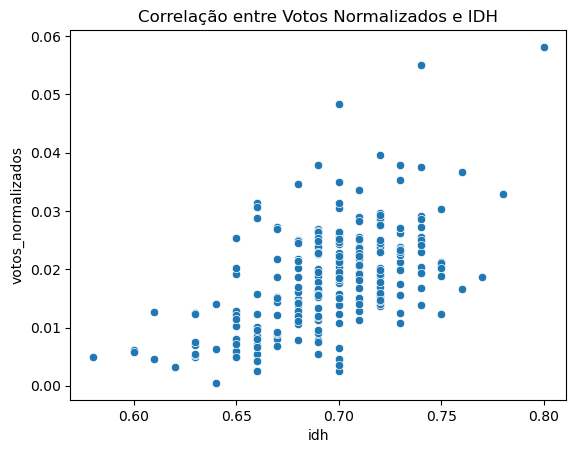

In [ ]:
# Visualizando a distribuição de votos normalizados com uma correlação espacial
sns.scatterplot(x='idh', y='votos_normalizados', data=gdf)
plt.title('Correlação entre Votos Normalizados e IDH')
plt.show()

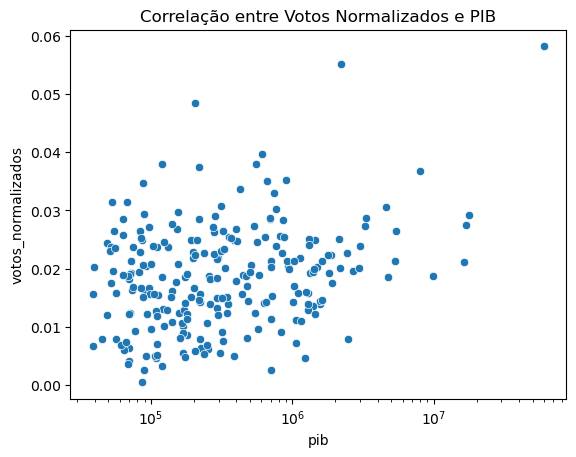

In [ ]:
# Visualizando a distribuição de votos normalizados com relação ao PIB em escala logarítmica
sns.scatterplot(x='pib', y='votos_normalizados', data=gdf)
plt.title('Correlação entre Votos Normalizados e PIB')
plt.xscale('log')  # Para o eixo X (PIB)
plt.show()

## Analise
### Candidato LUCAS DE CASTRO SANTOS



In [ ]:
# Exemplo de consulta com pandas
query = '''
SELECT
    v.NM_MUNICIPIO,
    SUM(v.QT_VOTOS) / d.pessoas AS votos_normalizados,
    d.idh,
    d.taxa_alfabetizacao,
    p.pib,
    p.valor_total,
    s.homicidio_dolor,
    goias.geom  -- Geometria do município
FROM
    votacao_secao_2022_go v
JOIN
    dados_censo d ON UPPER(v.NM_MUNICIPIO) = UPPER(d.municipio)
JOIN
    pib_municipio p ON UPPER(v.NM_MUNICIPIO) = UPPER(p.municipio)
JOIN
    seguranca s ON UPPER(v.NM_MUNICIPIO) = UPPER(s.municipio)
JOIN
    goias ON UPPER(v.NM_MUNICIPIO) = UPPER(goias.nm_mun)
WHERE
    v.DS_CARGO = 'DEPUTADO FEDERAL'
    AND v.NM_VOTAVEL = 'LUCAS DE CASTRO SANTOS'
GROUP BY
    v.NM_MUNICIPIO, d.idh, d.taxa_alfabetizacao, p.pib, p.valor_total, s.homicidio_dolor, d.pessoas, goias.geom
'''

# Carregando o resultado da consulta em um DataFrame
df = pd.read_sql(query, engine)

In [ ]:
df['geom'] = df['geom'].apply(wkb.loads)

# Carregar os dados geoespaciais em um GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry='geom')

# Definir o CRS correto (SRID 4674 para o Brasil)
gdf = gdf.set_crs('EPSG:4674')

# Exibir as primeiras linhas
gdf.head()

,nm_municipio,votos_normalizados,idh,taxa_alfabetizacao,pib,valor_total,homicidio_dolor,geom
0,ABADIA DE GOIÁS,0.002196,0.71,94.27,353700.292,310277.329,8.0,"MULTIPOLYGON (((-49.43605 -16.72057, -49.42988..."
1,ABADIÂNIA,0.000406,0.69,92.76,445324.202,399760.185,9.0,"MULTIPOLYGON (((-48.79129 -16.01593, -48.78974..."
2,ACREÚNA,0.001716,0.69,90.70,1051834.117,977935.015,3.0,"MULTIPOLYGON (((-50.39203 -17.18881, -50.35417..."
3,ADELÂNDIA,0.002177,0.70,89.78,48793.367,46629.427,NaN,"MULTIPOLYGON (((-50.19642 -16.30048, -50.18651..."
4,ÁGUA FRIA DE GOIÁS,0.224061,0.67,89.07,533232.876,514098.865,3.0,"MULTIPOLYGON (((-47.76054 -14.63915, -47.7555 ..."


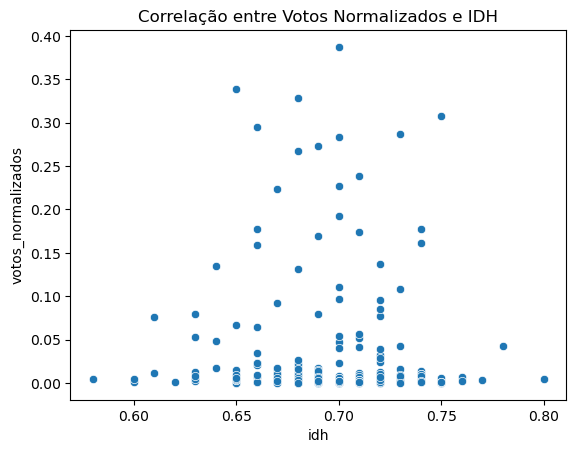

In [ ]:
# Visualizando a distribuição de votos normalizados com uma correlação espacial
sns.scatterplot(x='idh', y='votos_normalizados', data=gdf)
plt.title('Correlação entre Votos Normalizados e IDH')
plt.show()

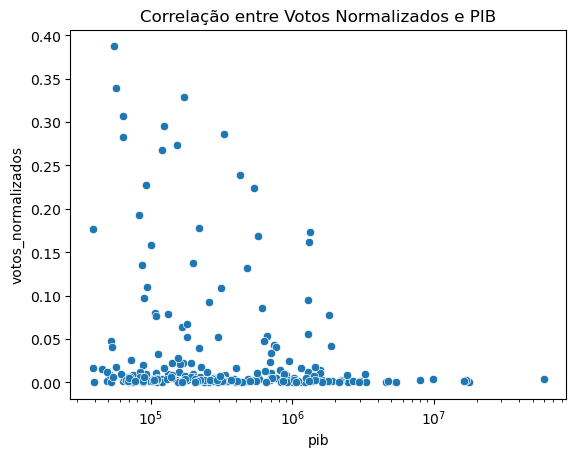

In [ ]:
# Visualizando a distribuição de votos normalizados com relação ao PIB em escala logarítmica
sns.scatterplot(x='pib', y='votos_normalizados', data=gdf)
plt.title('Correlação entre Votos Normalizados e PIB')
plt.xscale('log')  # Para o eixo X (PIB)
plt.show()

## Analise
### Correlacao Espacial


In [ ]:
# Verificar a correlação espacial usando o Moran's I (estatística de autocorrelação espacial)
from pysal.explore import esda
from pysal.lib import weights

# Criando pesos espaciais para os municípios com base na vizinhança
w = weights.KNN.from_dataframe(gdf, k=5)

# Calcular Moran's I para a variável 'idh'
moran = esda.Moran(gdf['idh'], w)
print(f'Moran’s I: {moran.I}')
print(f'p-value: {moran.p_sim}')

Moran’s I: 0.3022626280240772
p-value: 0.001


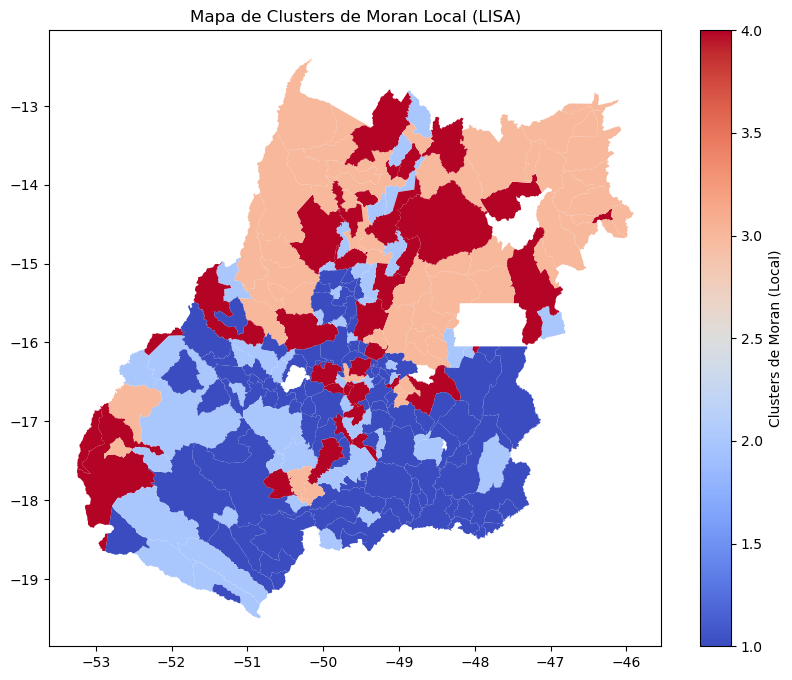

In [ ]:
from pysal.explore import esda

# Calculando o Moran's I local (LISA) para a variável 'idh'
lisa = esda.Moran_Local(gdf['idh'], w)

# Adicionando os resultados no GeoDataFrame
gdf['lisa_cluster'] = lisa.q
gdf['p_value'] = lisa.p_sim

# Mapa de clusters de Moran (local)
gdf.plot(column='lisa_cluster', cmap='coolwarm', legend=True, figsize=(10, 8),
         legend_kwds={'label': "Clusters de Moran (Local)"})
plt.title('Mapa de Clusters de Moran Local (LISA)')
plt.show()

## Análise de Correlação Espacial: Moran's I Local

Neste mapa, aplicamos a análise de Moran's I local para identificar padrões espaciais na distribuição dos dados para **Deputado Federal**.

- Outliers negativos (áreas vermelhas) destacam municípios que apresentam votação oposta aos seus vizinhos próximos, com padrões de votação divergentes. Isso sugere que esses municípios estão isolados em relação a outros, com diferenças de comportamento eleitoral significativas.

- Clusters positivos (áreas azuis) indicam que há municípios com características semelhantes que mostram uma concentração. Esses municípios tendem a votar de forma semelhante, sugerindo uma regionalização do apoio.

- **Valores próximos de zero** indicam que **não há padrão espacial claro**.

O mapa colorido destaca essas variações, facilitando a visualização dos padrões de votos em diferentes regiões.

### Conclusão:
O mapa revela regiões onde a votação se concentra e outras onde o comportamento é divergente.


### Dados Socioeconomicos


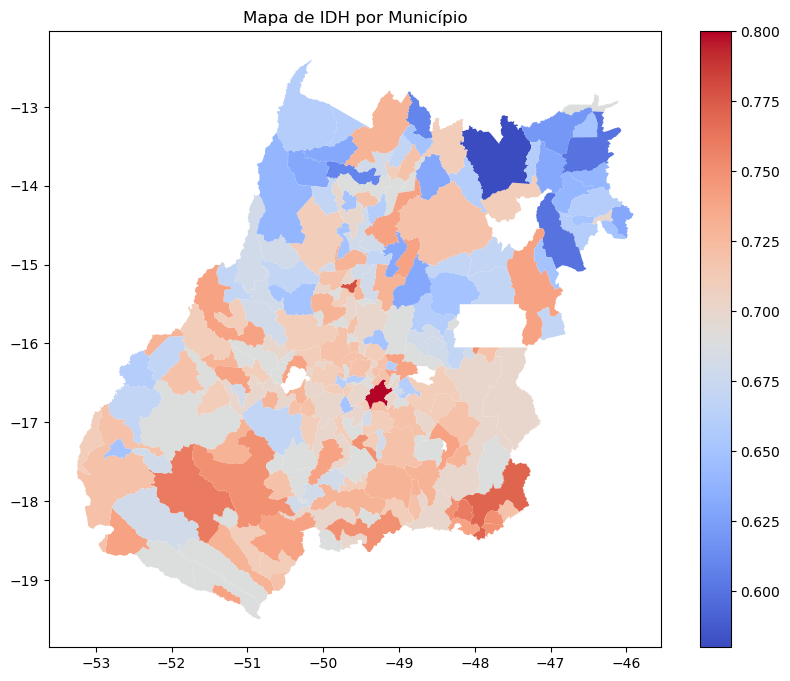

In [ ]:
#  geometria dos municípios e a variável de interesse (IDH)
gdf.plot(column='idh', legend=True, figsize=(10, 8), cmap='grey')
plt.title('Mapa de IDH por Município')
plt.show()

### Correlacao com taxa de Homicidios


In [ ]:
query = """
SELECT
    v.NM_MUNICIPIO,
    SUM(v.QT_VOTOS) / d.pessoas AS votos_normalizados,
    s.homicidio_dolor,
    g.geom  -- Pegando a geometria da tabela goias
FROM
    votacao_secao_2022_go v
JOIN
    dados_censo d ON UPPER(v.NM_MUNICIPIO) = UPPER(d.municipio)
JOIN
    seguranca s ON UPPER(v.NM_MUNICIPIO) = UPPER(s.municipio)
JOIN
    goias g ON UPPER(v.NM_MUNICIPIO) = UPPER(g.nm_mun)  -- Fazendo JOIN com a geometria
WHERE
    v.DS_CARGO = 'DEPUTADO FEDERAL'
    AND v.NM_VOTAVEL = 'GUSTAVO GAYER MACHADO DE ARAUJO'
GROUP BY
    v.NM_MUNICIPIO, s.homicidio_dolor, d.pessoas, g.geom;
"""

# Carregar os dados como GeoDataFrame
gdf = gpd.read_postgis(text(query), engine, geom_col='geom')

# Visualizar os dados carregados
gdf.head()

,nm_municipio,votos_normalizados,homicidio_dolor,geom
0,ABADIA DE GOIÁS,0.025512,8.0,"MULTIPOLYGON (((-49.43605 -16.72057, -49.42988..."
1,ABADIÂNIA,0.018918,9.0,"MULTIPOLYGON (((-48.79129 -16.01593, -48.78974..."
2,ACREÚNA,0.011267,3.0,"MULTIPOLYGON (((-50.39203 -17.18881, -50.35417..."
3,ADELÂNDIA,0.024380,NaN,"MULTIPOLYGON (((-50.19642 -16.30048, -50.18651..."
4,ÁGUA FRIA DE GOIÁS,0.027251,3.0,"MULTIPOLYGON (((-47.76054 -14.63915, -47.7555 ..."


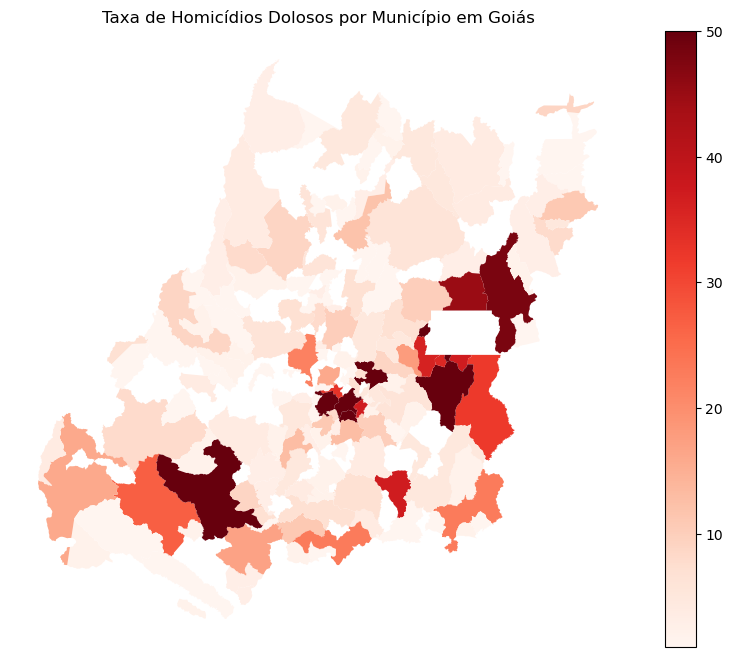

In [ ]:
# Mapa da taxa de homicídios dolosos
gdf.plot(column='homicidio_dolor', cmap='Reds', legend=True, figsize=(10, 8), vmax=50)
plt.title('Taxa de Homicídios Dolosos por Município em Goiás')
plt.axis('off')
plt.show()